## Sales Data Analysis Project

### Introduction
This project involves the analysis of a sales dataset to uncover insights and trends. We will perform data cleaning and preprocessing to ensure the data is ready for analysis, followed by exploratory data analysis (EDA) and time series forecasting.

### Data Source
The dataset contains information related to Sales, Profits and other interesting facts of a Superstore giant from [Kaggle.com](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final?resource=download).

### Objectives
1. Clean and preprocess the data to handle any missing values, duplicates, and inconsistencies.
2. Perform feature engineering to create new useful features.
3. Conduct exploratory data analysis to understand trends and patterns.
4. Forecast future sales using time series analysis.


### Import Libraries and Load the Data

We begin by importing the necessary Python librariries and loading the dataset into a Pandas DataFrame. The data is encoded in `latin1` to handle any special characters that might cause issues with the default `utf-8` encoding.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for better visualization
%matplotlib inline

# Load the data with a latin1 encoding as utf-8 did not work
try:
    data = pd.read_csv('/Users/rwilcox/GitHub/rjwilcoxdata/Data-Analytics-Portfolio/Project1/data/Superstore.csv', encoding='latin1')
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")

# Display the first few rows of the dataset
data.head()


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Data loaded successfully.


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Data Cleaning and Preprocessing

#### Step 1: Check for Missing Values

Before we start analyzing the data, it is crucial to check for any missing values. Missing values can affect the results of our analysis, so we need to handle them appropriately.

We will use the `isnull()` function to check for missing values in each column and the `sum()` function to get the total count of missing values per column.


In [2]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### Step 2: Handle Missing Values

Depending on the results from the previous step, we will decide how to handle the missing values. Common strategies include:

- Dropping rows with missing values
- Imputing missing values with appropriate values (e.g., mean, median, mode)

For this dataset, we would drop any rows with missing values using the `.dropna()` method.


In [3]:
# Drop rows with missing values
data.dropna(inplace=True)

However, since there are no missing values in the dataset, we can proceed to the next steps without needing to handle missing data.

#### Step 3: Handle Duplicates

It is important to check for and handle any duplicate rows in the dataset to ensure the accuracy of our analysis. Duplicate rows can occur due to data entry errors or merging datasets.


In [4]:
# Check for duplicate rows
duplicates = data.duplicated()
print("Number of duplicate rows:", duplicates.sum())

# Drop duplicate rows
data = data.drop_duplicates()


Number of duplicate rows: 0


#### Step 4: Convert Data Types

Next, we need to ensure that the `Order Date` and `Ship Date` columns are in datetime format. This will allow us to perform time series analysis and other date-related operations more efficiently.

We will use the `pd.to_datetime()` function to convert these columns to datetime format.


In [5]:
# Convert date columns to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

These functions take the `Order Date` and `Ship Date` columns as an input and converts them to datetime objects.

Converting to datetime format allows us to perform operations such as extracting the year, month, day, and more complex date manipulations, such as time series analysis.

#### Step 5: Check for Consistency in Dates

Now that we have converted the date columns to datetime format, we need to ensure that the `Ship Date` is always after the `Order Date`. This is important to maintain data consistency, as a ship date before an order date would indicate an error in the data.

We will check for any inconsistencies by comparing the `Ship Date` and `Order Date` columns.


In [6]:
# Check for consistency in dates
inconsistent_dates = data[data['Ship Date'] < data['Order Date']]
inconsistent_dates

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


The above code checks if there are any rows where the `Ship Date` is earlier than the `Order Date`. If there are any inconsistencies, we will need to investigate and possibly correct them.

- `data['Ship Date'] < data['Order Date']`: This condition checks if the `Ship Date` is earlier than the `Order Date`.
- `data[data['Ship Date'] < data['Order Date']]`: This filters the DataFrame to include only those rows where the condition is true.

If the resulting DataFrame `inconsistent_dates` is empty, it means all dates are consistent. If it contains rows, we need to review and correct the inconsistencies.


#### Step 6: Feature Engineering

Feature engineering involves creating new features from the existing data to help improve our analysis. In this step, we will extract the year and month from the `Order Date` column and create new columns for these values.

This will allow us to analyze sales trends on a yearly and monthly basis.


In [7]:
# Extract year and month from the Order Date
data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month

We have created two new columns: `Order Year` and `Order Month`. These columns will help us analyze sales trends on a yearly and monthly basis.


### Step 7: Visualization of Feature Engineering

To understand the distribution of the newly created features, we will visualize the `Order Year` and `Order Month` columns using count plots.

- **Distribution of Order Year**: This plot shows the number of orders for each year in the dataset. It helps us understand if there is a trend in the number of orders over time.
- **Distribution of Order Month**: This plot shows the number of orders for each month. It helps identify any seasonal patterns or trends within a year.

By visualizing these features, we can gain insights into how orders are distributed over time and prepare for further analysis.


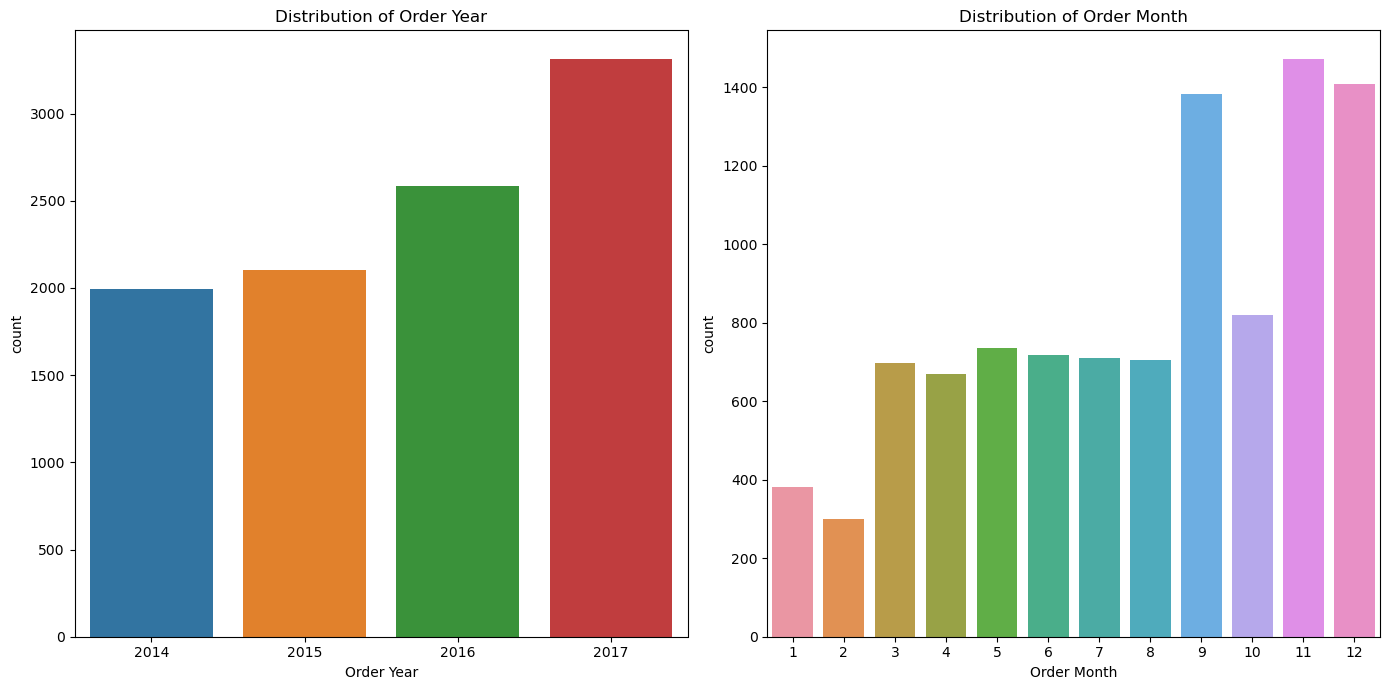

In [8]:
# Visualize the distribution of Order Year and Order Month
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.countplot(x='Order Year', data=data)
plt.title('Distribution of Order Year')

plt.subplot(1, 2, 2)
sns.countplot(x='Order Month', data=data)
plt.title('Distribution of Order Month')

plt.tight_layout()
plt.show()


## Exploratory Data Analysis (EDA)

### Step 1: Overview of the Data

#### Summary Statistics
We start by getting the summary statistics for the numerical columns in the dataset. Summary statistics provide a quick overview of the data, including measures such as mean, median, standard deviation, minimum, and maximum values. This helps us understand the basic characteristics of the data.


In [9]:
# Summary statistics for relevant numerical columns
summary_stats = data[['Sales', 'Profit', 'Quantity', 'Discount']].describe()
summary_stats

,Sales,Profit,Quantity,Discount
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,28.656896,3.789574,0.156203
std,623.245101,234.260108,2.225110,0.206452
min,0.444000,-6599.978000,1.000000,0.000000
25%,17.280000,1.728750,2.000000,0.000000
50%,54.490000,8.666500,3.000000,0.200000
75%,209.940000,29.364000,5.000000,0.200000
max,22638.480000,8399.976000,14.000000,0.800000


#### Analysis and Insights

The summary statistics provide the following insights for numerical variables:

- **Sales**:
  - **Mean**: The average sales value is approximately $229.86.
  - **Standard Deviation**: The standard deviation is $623.25, indicating a wide range of sales values.
  - **Min/Max**: The sales values range from $0.44 to $22,638.48, showing the presence of high-value sales transactions.
  - **Percentiles**: The 25th percentile is $17.28, the 50th percentile (median) is $54.49, and the 75th percentile is $209.94. This suggests that a significant portion of the sales transactions are relatively small, but there are a few high-value transactions.

- **Profit**:
  - **Mean**: The average profit is approximately $28.66.
  - **Standard Deviation**: The standard deviation is $234.26, indicating high variability in profit.
  - **Min/Max**: The profit values range from -$6,599.98 to $8,399.98, indicating the presence of both significant losses and high profits.
  - **Percentiles**: The 25th percentile is $1.73, the median is $8.67, and the 75th percentile is $29.36. This suggests that most transactions are modestly profitable, with some outliers.

- **Quantity**:
  - **Mean**: The average quantity of items sold per order is approximately 3.79.
  - **Standard Deviation**: The standard deviation is 2.23, indicating some variability in order sizes.
  - **Min/Max**: The quantity values range from 1 to 14, with most orders containing a small number of items.
  - **Percentiles**: The 25th percentile is 2, the median is 3, and the 75th percentile is 5.

- **Discount**:
  - **Mean**: The average discount applied is approximately 15.62%.
  - **Standard Deviation**: The standard deviation is 20.65%, indicating significant variability in discounts.
  - **Min/Max**: The discount values range from 0% to 80%.
  - **Percentiles**: The 25th percentile is 0%, the median is 20%, and the 75th percentile is 20%.

From the summary statistics, we can observe the central tendency and dispersion of these key metrics, which sets the stage for more detailed analysis.


### Data Information
We will display information about the data types and non-null counts for each column. This helps identify any missing values and understand the structure of the dataset.


In [10]:
# Information about data types and non-null counts
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

### Step 2: Univariate Analysis

#### Distribution of Numerical Variables
We visualize the distribution of the numerical variables using histograms and box plots. This helps us understand the spread and skewness of the data, identify any potential outliers, and observe the overall shape of the data.


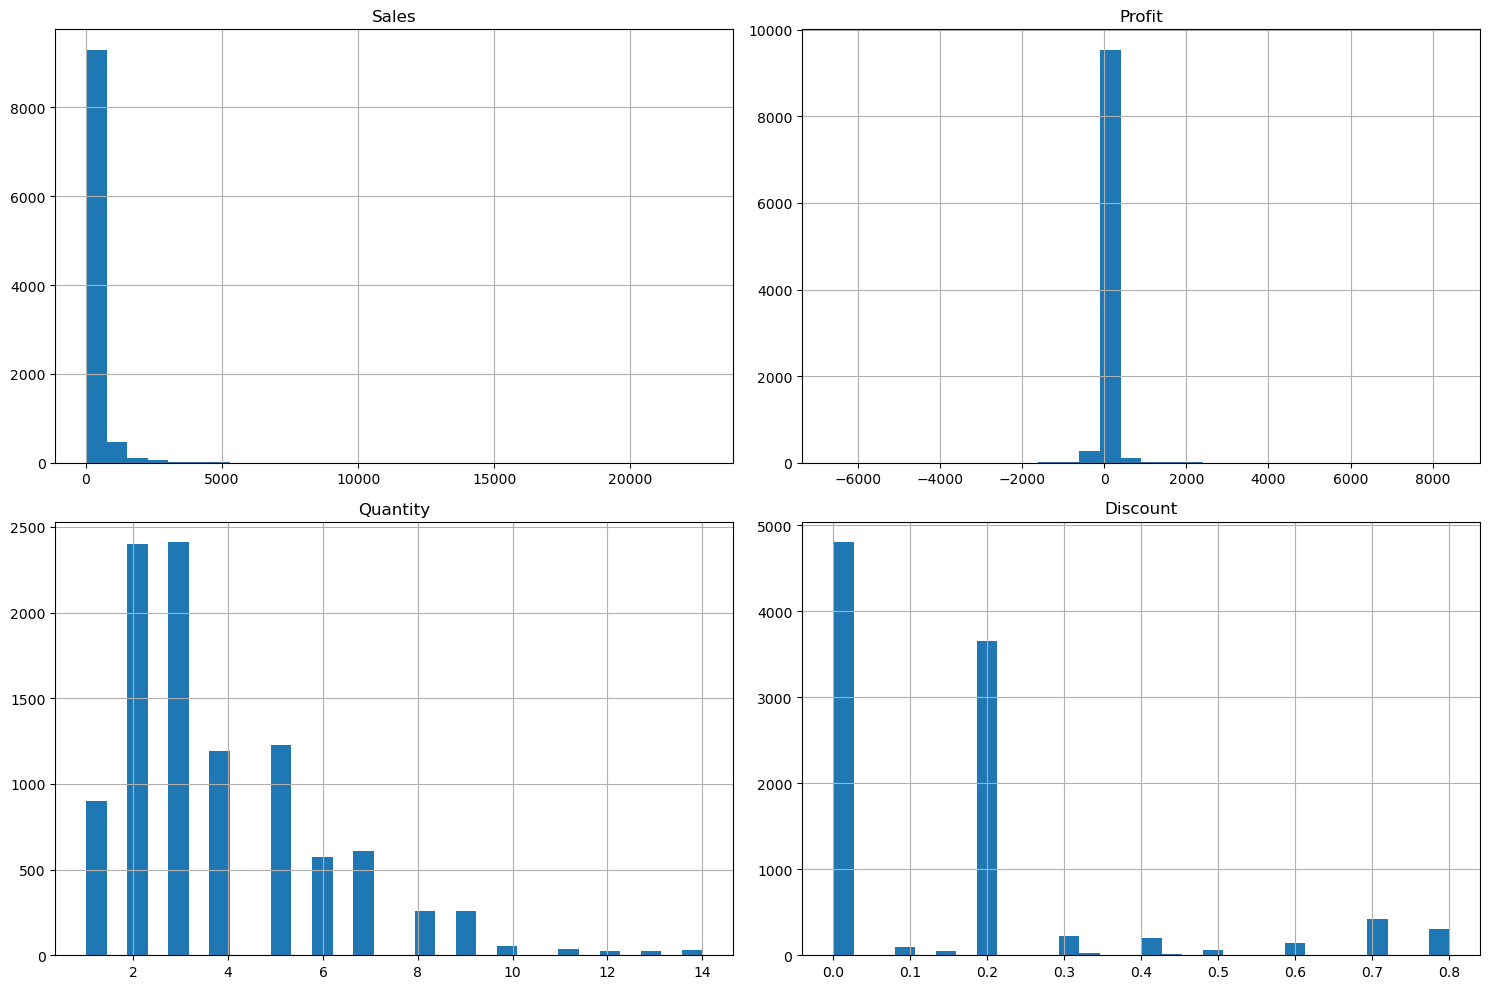

In [11]:
# Histograms for numerical variables
data[['Sales', 'Profit', 'Quantity', 'Discount']].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

#### Histograms for Numerical Variables
- **Sales**:
  - The majority of sales transactions are relatively small, with a few high-value transactions.
  - The distribution is right-skewed, indicating that a large number of transactions are clustered at the lower end of the sales range.
  
- **Profit**:
  - Similar to sales, the profit distribution is also right-skewed.
  - There are a significant number of transactions with small profits, and a few transactions with high profits and losses.
  
- **Quantity**:
  - The quantity of items sold per order is generally low, with most orders containing between 2 to 5 items.
  - There are fewer transactions with higher quantities.
  
- **Discount**:
  - Discounts are mostly clustered around 0% and 20%.
  - The distribution shows peaks at these values, indicating common discount rates.

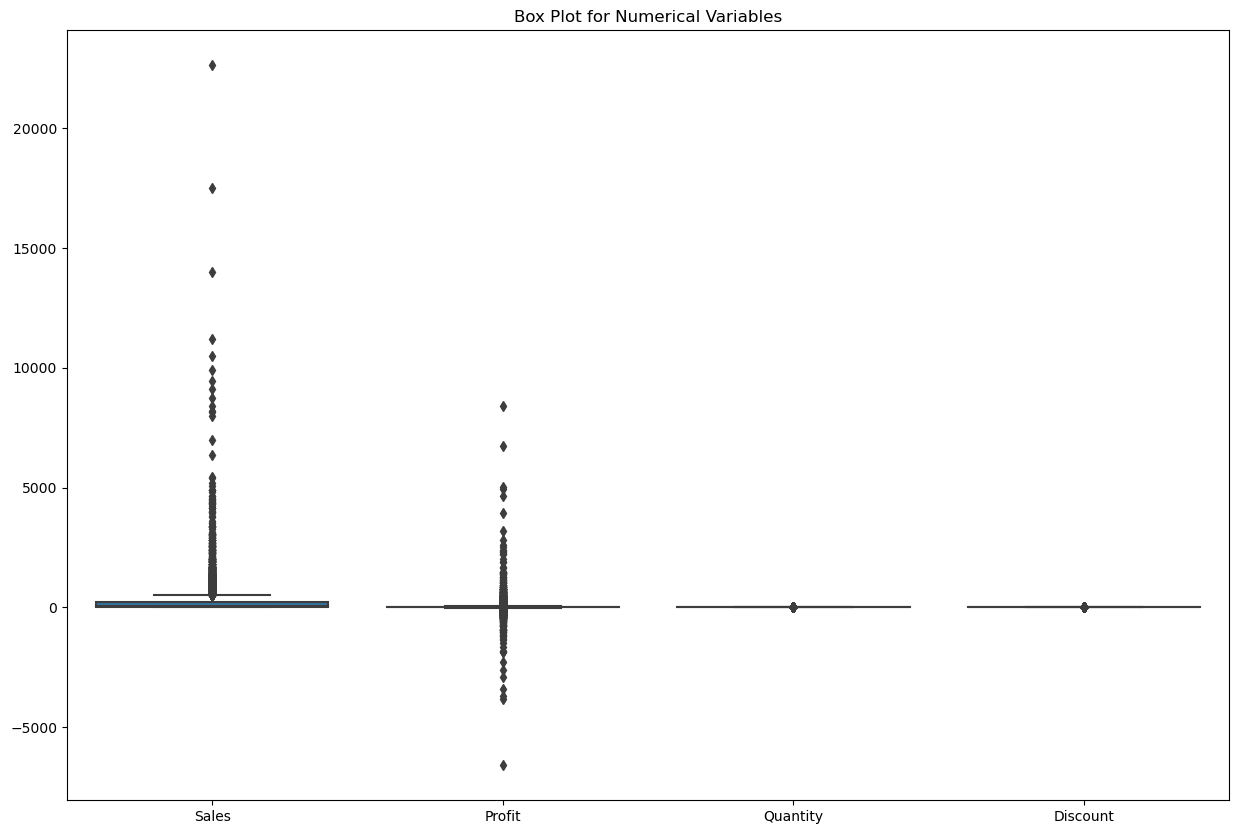

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plots for numerical variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=data[['Sales', 'Profit', 'Quantity', 'Discount']])
plt.title('Box Plot for Numerical Variables')
plt.show()


#### Box Plots for Numerical Variables
- **Sales**:
  - There are several outliers, with a few sales transactions being significantly higher than the rest.
  - The interquartile range (IQR) is narrow, indicating that most sales values are clustered around the median.
  
- **Profit**:
  - The profit distribution has many outliers, both on the positive and negative sides, indicating high variability in profitability.
  - The IQR is also narrow, suggesting that most profit values are near the median.
  
- **Quantity**:
  - The distribution of quantity sold per order appears more uniform, with fewer outliers.
  - Most of the data points lie within a small range, indicating consistency in the quantity ordered.
  
- **Discount**:
  - The discount distribution has fewer outliers, indicating a more consistent application of discounts.
  - The IQR shows that discounts are generally within a small range around the median.


#### Count Plots for Categorical Variables
We analyze the distribution of categorical variables using count plots. This helps identify the most common and least common categories in the data.


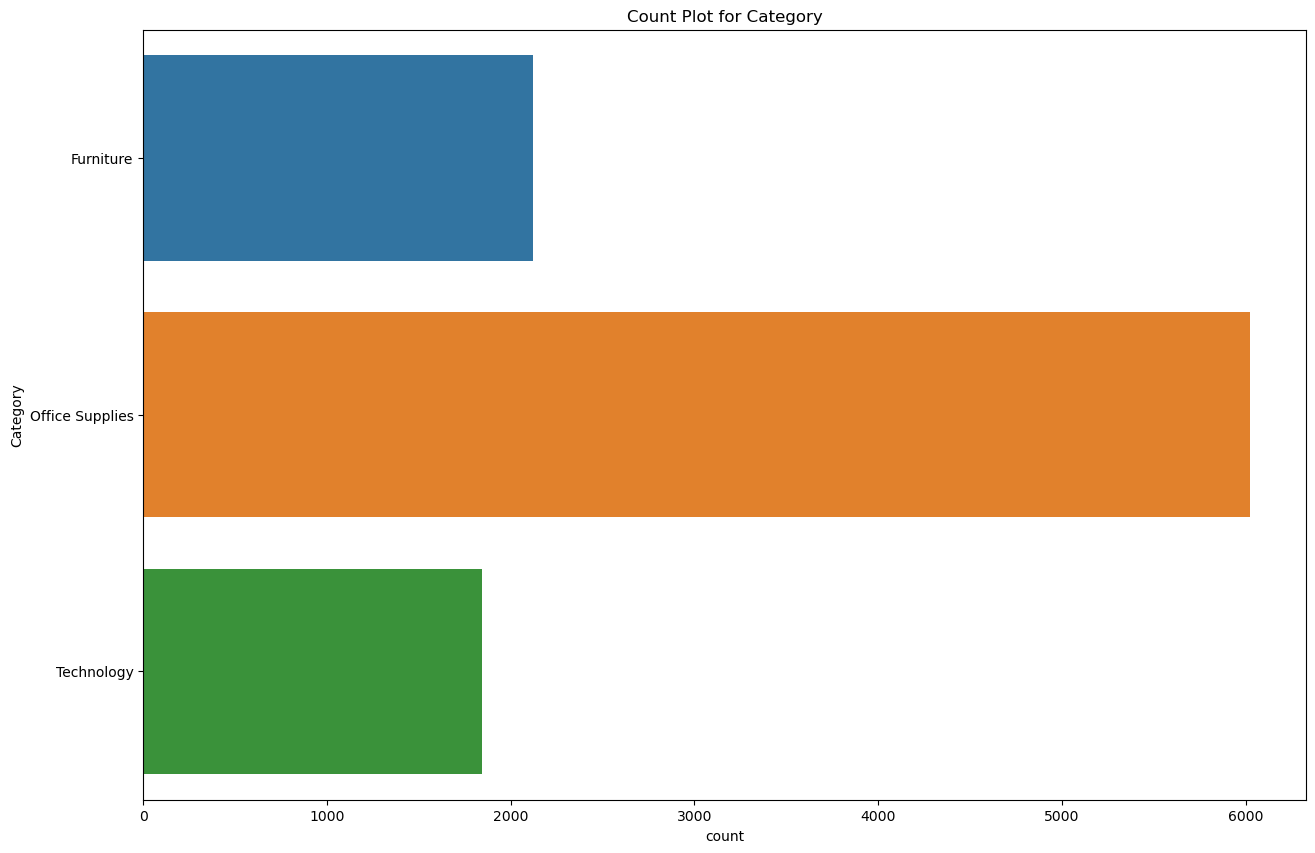

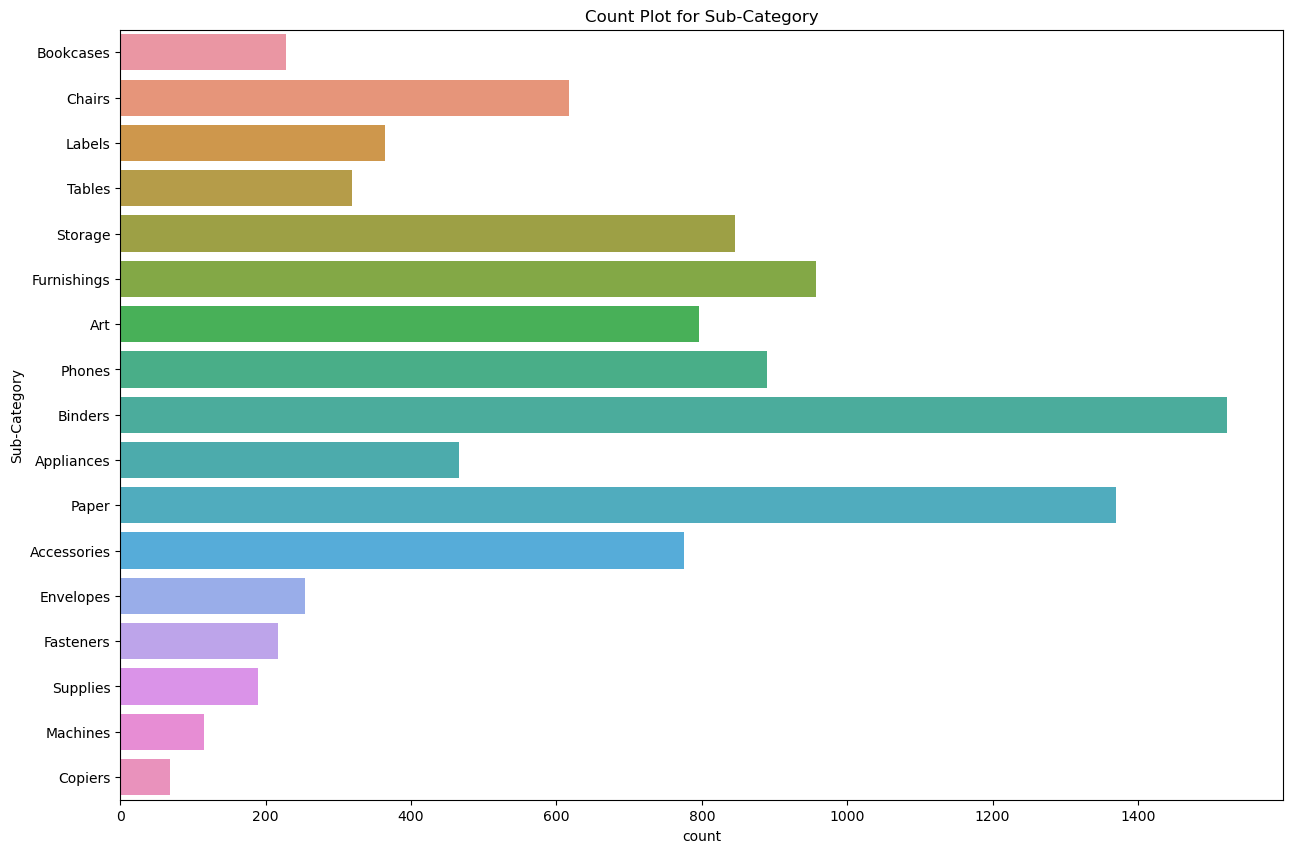

In [13]:
# Count plots for categorical variables
plt.figure(figsize=(15, 10))
sns.countplot(y='Category', data=data)
plt.title('Count Plot for Category')
plt.show()

plt.figure(figsize=(15, 10))
sns.countplot(y='Sub-Category', data=data)
plt.title('Count Plot for Sub-Category')
plt.show()

#### Count Plots for Categorical Variables
- **Category**:
  - **Office Supplies**: This is the most frequent category, indicating that most transactions involve office supplies.
  - **Furniture**: This is the second most frequent category.
  - **Technology**: This category has the least number of transactions compared to the other two.
  
- **Sub-Category**:
  - **Binders**: This sub-category has the highest count, suggesting it is the most frequently sold item.
  - **Paper** and **Furnishings**: These are also among the top sub-categories in terms of count.
  - **Copiers**: This sub-category has the least number of transactions.


### Step 3: Bivariate Analysis

#### Scatter Plots for Numerical Variables
Scatter plots help us visualize the relationship between two numerical variables. We will plot Sales vs. Profit, Sales vs. Quantity, and Quantity vs. Discount to identify any patterns or correlations.


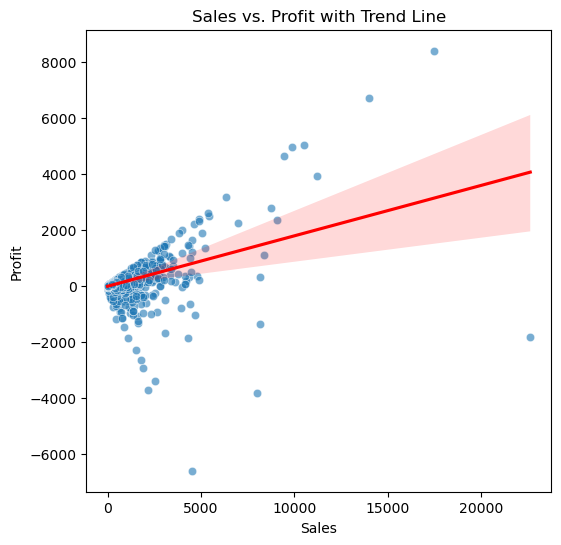

In [14]:
# Scatter plot with trend line for Sales vs. Profit
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Sales', y='Profit', data=data, alpha=0.6)
sns.regplot(x='Sales', y='Profit', data=data, scatter=False, color='red')
plt.title('Sales vs. Profit with Trend Line')
plt.show()


#### Sales vs. Profit with Trend Line
The scatter plot with a trend line helps us understand the relationship between sales and profit.

- **Positive Correlation**: The trend line shows a positive correlation between sales and profit. As sales increase, profit also tends to increase.
- **Profitability Analysis**: The slope of the trend line indicates how profit changes with sales. A steeper slope suggests that profits increase rapidly with sales, while a flatter slope indicates a slower increase.
- **Outliers**: Points that deviate significantly from the trend line represent sales with unusually high or low profits, potentially due to discounts, promotions, or other factors affecting profitability.


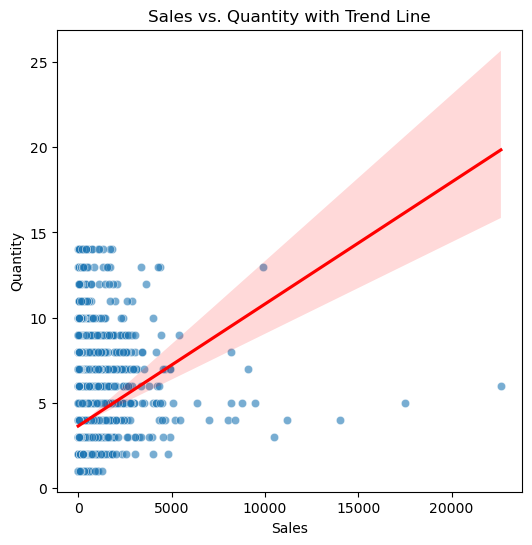

In [15]:
# Scatter plot with trend line for Sales vs. Quantity
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Sales', y='Quantity', data=data, alpha=0.6)
sns.regplot(x='Sales', y='Quantity', data=data, scatter=False, color='red')
plt.title('Sales vs. Quantity with Trend Line')
plt.show()


#### Sales vs. Quantity with Trend Line
The scatter plot with a trend line helps us understand the relationship between sales and quantity sold.

- **Proportional Relationship**: The trend line indicates a positive relationship between sales and quantity. Higher quantities sold are generally associated with higher sales.
- **Pricing Strategy**: The slope of the trend line gives insights into the pricing strategy. A steeper slope suggests higher-priced items, while a flatter slope indicates lower-priced items.
- **Sales Patterns**: The trend line helps identify overall sales patterns relative to quantity. Deviations from the trend line may indicate orders that do not follow the general pattern, warranting further investigation.


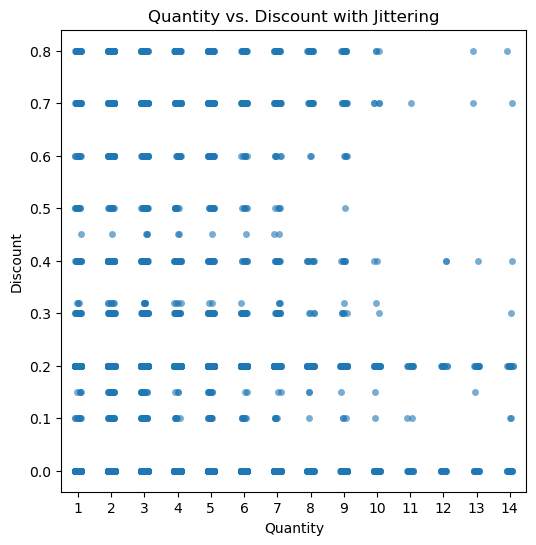

In [16]:
# Scatter plot with jittering for Quantity vs. Discount
plt.figure(figsize=(6, 6))
sns.stripplot(x='Quantity', y='Discount', data=data, jitter=True, alpha=0.6)
plt.title('Quantity vs. Discount with Jittering')
plt.show()


#### Quantity vs. Discount with Jittering
Adding jittering to the scatter plot helps reduce overplotting, making the distribution of points more visible. This is particularly useful when visualizing discrete data or data with many overlapping points.

- **Spread of Data Points**: Jittering the data points helps to visualize the spread and density of the quantities and discounts.
- **Discount Patterns**: The plot shows how discounts are distributed across different quantities. Any patterns or clusters can indicate specific discount strategies or promotions.


#### Correlation Matrix

A correlation matrix shows the correlation coefficients between different variables. The values range from -1 to 1, indicating the strength and direction of the relationship. A value close to 1 implies a strong positive correlation, -1 implies a strong negative correlation, and 0 implies no correlation.


/var/folders/56/v8gn1zkd3755z9xk1b990gqm0000gn/T/ipykernel_87459/3138719114.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


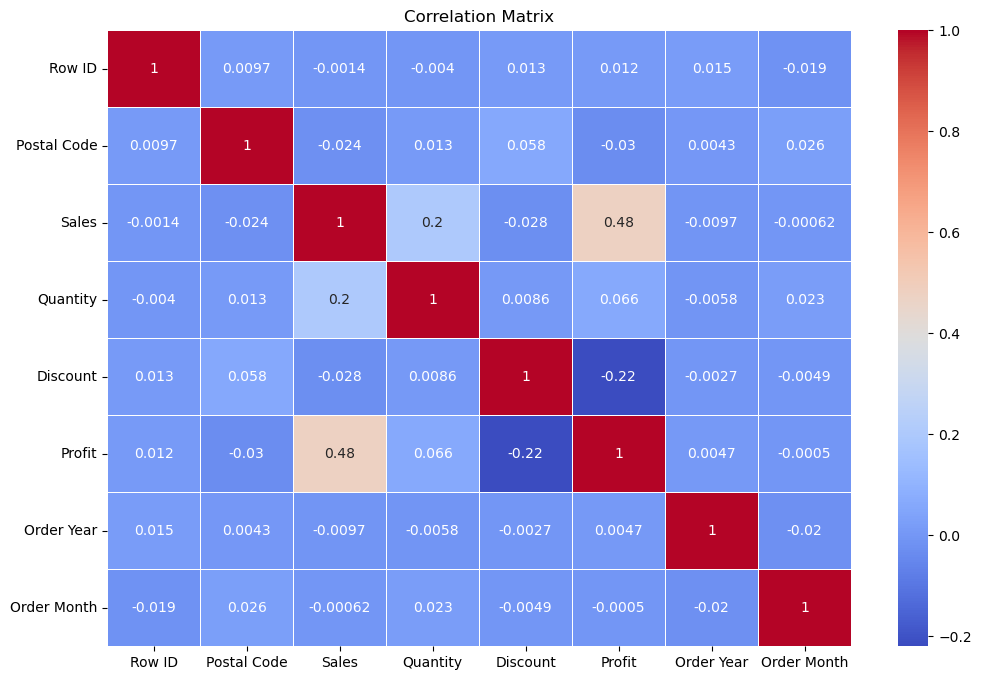

In [21]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Correlation Matrix Analysis

The correlation matrix provides insights into the relationships between different numerical variables in the dataset. Here are some key takeaways:

- **Sales and Profit**: There is a moderate positive correlation (0.48) between Sales and Profit. This suggests that as sales increase, profit tends to increase as well, which is expected.
- **Sales and Quantity**: There is a weak positive correlation (0.20) between Sales and Quantity, indicating that higher sales are somewhat associated with higher quantities sold.
- **Discount and Profit**: There is a weak negative correlation (-0.22) between Discount and Profit. This indicates that higher discounts are generally associated with lower profits - which is also an expected relationship.

The correlations between other variables are relatively weak and may not provide significant insights.


### Step 4: Multivariate Analysis

#### Pair Plot

A pair plot visualizes relationships between multiple pairs of variables. It helps identify potential interactions and patterns across several variables at once.


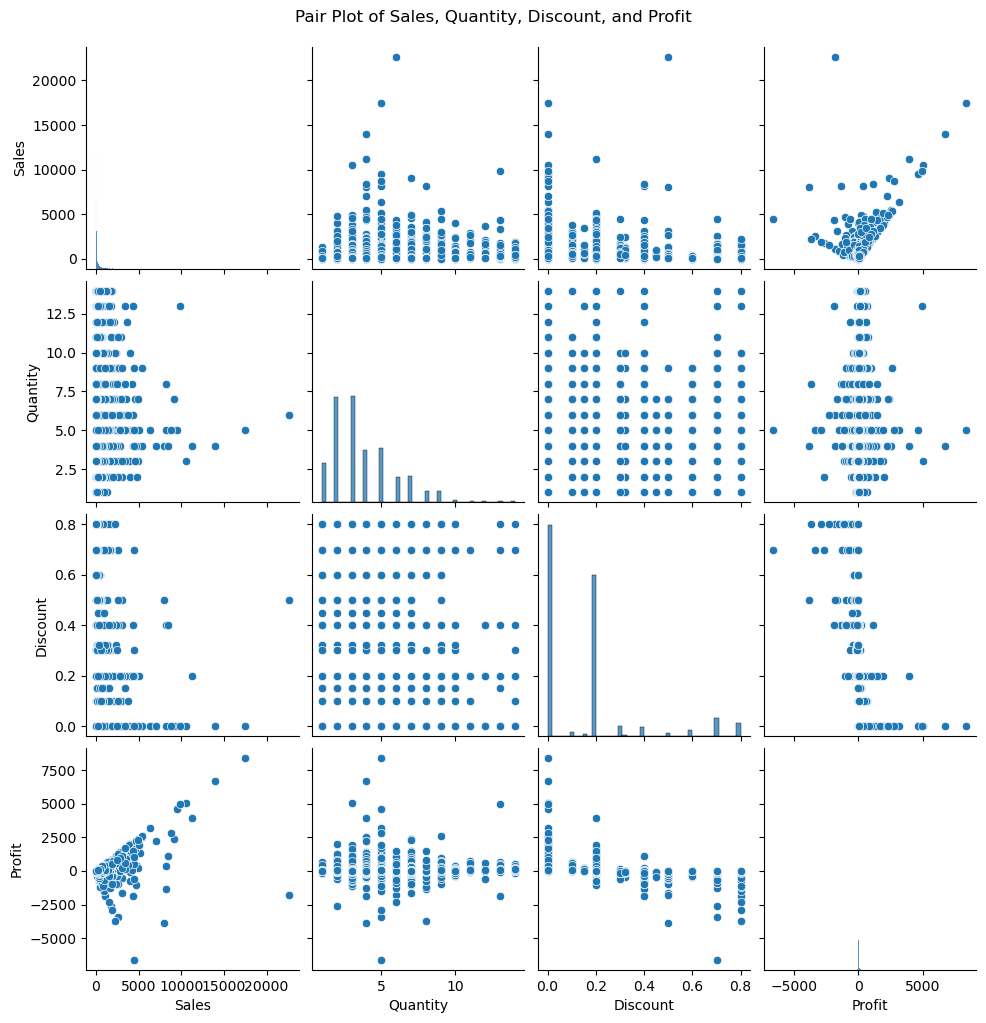

In [22]:
# Select a subset of columns for pair plotting
subset = data[['Sales', 'Quantity', 'Discount', 'Profit']]

# Create the pair plot
sns.pairplot(subset)
plt.suptitle('Pair Plot of Sales, Quantity, Discount, and Profit', y=1.02)
plt.show()

### Pair Plot Analysis

The pair plot visualizes relationships between the variables: `Sales`, `Quantity`, `Discount`, and `Profit`. 

- **Sales vs. Profit**: There is a positive correlation, indicating that as sales increase, profit generally increases as well. However, some points with high sales correspond to low or negative profit, suggesting other factors like high discounts affecting profitability.
- **Sales vs. Quantity**: There's a positive correlation, with higher quantities correlating with higher sales.
- **Sales vs. Discount**: No clear pattern observed. The discount distribution appears random across different sales values.
- **Quantity vs. Profit**: A weak positive correlation. Higher quantities sold tend to have slightly higher profits, but the relationship is not strong.
- **Quantity vs. Discount**: Discounts are spread across different quantities without a clear trend, suggesting a uniform or random discount strategy.
- **Discount vs. Profit**: A weak negative correlation, indicating that higher discounts generally reduce profit.

These insights help understand how different variables interact and impact sales and profit.


### Pair Plot with Categorical Hue
A pair plot with a categorical hue allows us to explore the relationships between multiple numerical variables while considering the effect of a categorical variable. This helps in understanding how different segments or categories influence these relationships. By comparing pair plots with and without categorical hues, we can demonstrate the added value of segmenting the data by categorical variables.

The pair plot below includes the `Category` variable as the hue, which segments the data into different categories such as `Furniture`, `Office Supplies`, and `Technology`.

```python
# Plot pair plot with categorical hue
sns.pairplot(data[['Sales', 'Quantity', 'Discount', 'Profit', 'Category']], hue='Category')
plt.suptitle('Pair Plot with Category Hue', y=1.02)
plt.show()


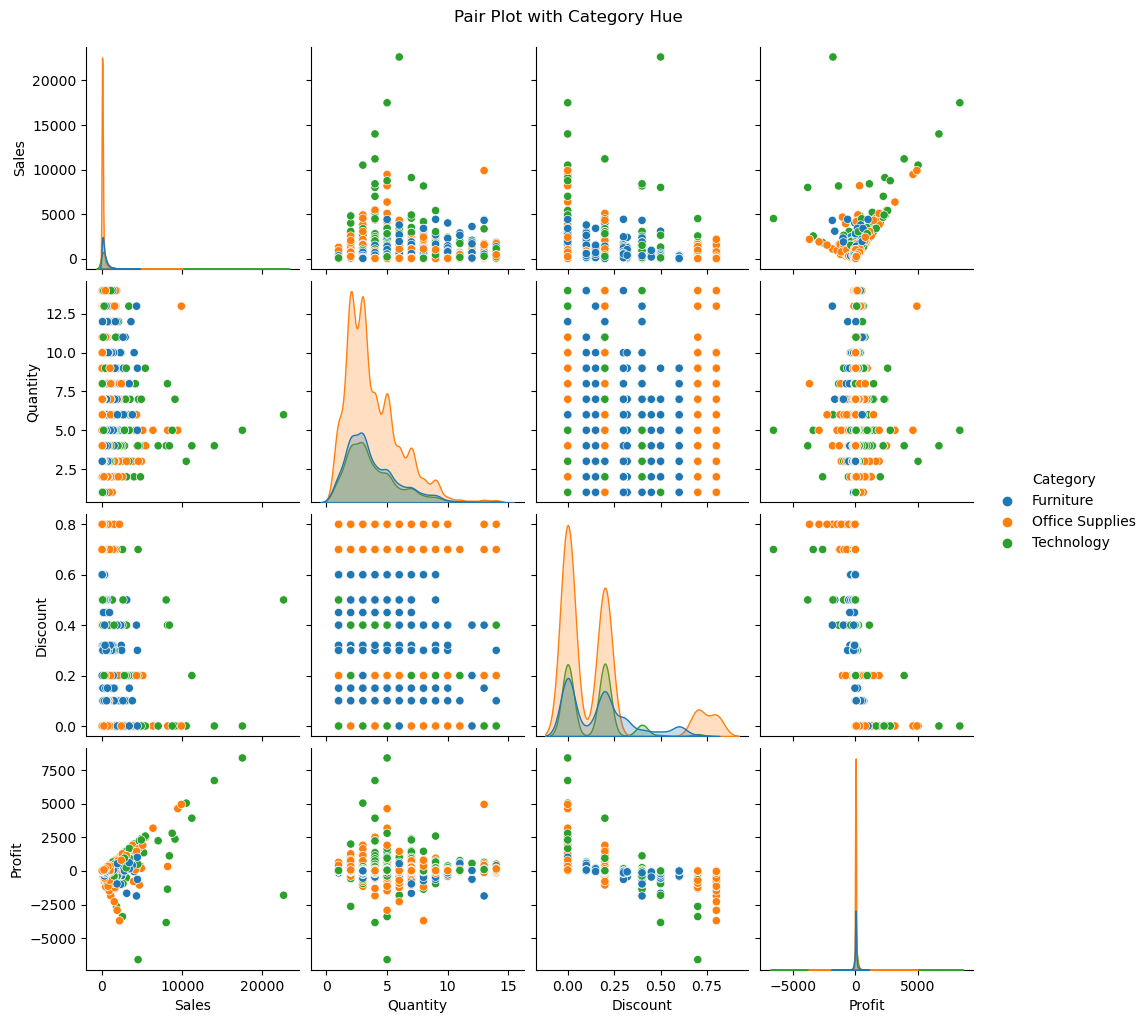

In [ ]:
# Plot pair plot with categorical hue
sns.pairplot(data[['Sales', 'Quantity', 'Discount', 'Profit', 'Category']], hue='Category')
plt.suptitle('Pair Plot with Category Hue', y=1.02)
plt.show()


#### Insights from Pair Plot with Categorical Hue

The pair plot with a categorical hue provides more nuanced insights into the relationships between numerical variables:

- **Sales vs. Profit**: When segmented by `Category`, we can see that the positive relationship between `Sales` and `Profit` holds across all categories, but the `Technology` category shows a higher spread in both sales and profit compared to `Furniture` and `Office Supplies`.
- **Sales vs. Quantity**: The relationship between `Sales` and `Quantity` appears to vary slightly by category, with `Furniture` items showing higher sales for lower quantities compared to other categories.
- **Quantity vs. Discount**: This plot shows that higher discounts are not necessarily leading to higher quantities, and this pattern holds true across all categories. However, there are noticeable clusters indicating specific discount levels frequently offered across categories.
- **Profit vs. Discount**: The negative relationship between `Profit` and `Discount` is evident across all categories, indicating that higher discounts generally reduce profit margins. This relationship appears to be more pronounced in the `Office Supplies` category.

By incorporating the categorical hue, we gain a deeper understanding of how different product categories behave in relation to key numerical variables. This segmentation can inform targeted strategies for different product lines, such as adjusting discount strategies to optimize profit margins or identifying which categories contribute most significantly to overall sales and profit.

Including both pair plots with and without categorical hues demonstrates a comprehensive approach to data visualization, highlighting the importance of considering categorical variables in multivariate analysis.


### Step 5: Time Series Analysis

Time series analysis helps us understand the patterns and trends in sales data over time. This includes identifying long-term trends, seasonal patterns, and irregular components. Here, we will decompose the time series data to break down sales into its constituent components.
